
Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

source
https://www.kaggle.com/datasets/carrie1/ecommerce-data/code



In [1]:
from deep_translator import GoogleTranslator
lang = 'ru'
def audaru(text):
    return GoogleTranslator(source='auto', target=lang).translate(text)

In [2]:
tmp = 'Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".'
display(audaru(tmp))


'Обычно наборы данных электронной коммерции являются частными и, следовательно, их трудно найти среди общедоступных данных. Однако, The UCI Machine Learning Repository создал этот набор данных, содержащий фактические транзакции с 2010 и 2011 годов. Набор данных поддерживается на их сайте, где его можно найти по названию «Online Retail».'

In [3]:
!kaggle datasets download -d carrie1/ecommerce-data

Dataset URL: https://www.kaggle.com/datasets/carrie1/ecommerce-data
License(s): unknown
100%|██████████████████████████████████████| 7.20M/7.20M [00:01<00:00, 8.42MB/s]
100%|██████████████████████████████████████| 7.20M/7.20M [00:01<00:00, 5.77MB/s]


In [4]:
!ls -l

итого 52416
-rw-rw-r-- 1 yerzhan yerzhan 45580638 Қыр 20  2019 data.csv
-rw-rw-r-- 1 yerzhan yerzhan  7548686 Қыр 20  2019 ecommerce-data.zip
-rw-rw-r-- 1 yerzhan yerzhan   533896 Қаз 18 08:38 EComm.ipynb


In [5]:
#!unzip ecommerce-data.zip
!rm ecommerce-data.zip

In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


покупки совершенные в минус? Довольно странно

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


видим пропуски по CustomerID и Description. Давайте детальнее гляним на них

In [10]:
df[df['CustomerID'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

давайте посмотрим описания

In [12]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

In [13]:
print('всего уникальных описании товара', df['Description'].nunique())

всего уникальных описании товара 4223


давайте посмотрим по отрицательным количествам

In [14]:
df[df['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [15]:
df[df['InvoiceNo']=='C536391']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/2010 10:24,1.65,17548.0,United Kingdom


In [16]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, cache=True)

В описании данных мы видим, что отмененные транзакции начинаются с буквы "C" перед ними. Давайте создадим функцию, которая легко отфильтрует эти случаи:

In [17]:
df["IsCancelled"]=np.where(df.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)
df.IsCancelled.value_counts() / df.shape[0] * 100

IsCancelled
False    98.286059
True      1.713941
Name: count, dtype: float64

In [18]:
df[df.IsCancelled==True].describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,9288.000000,9288,9288.000000,8905.000000
mean,-29.885228,2011-06-26 03:42:05.943152640,48.393661,14991.667266
min,-80995.000000,2010-12-01 09:41:00,0.010000,12346.000000
25%,-6.000000,2011-03-21 16:15:00,1.450000,13510.000000
50%,-2.000000,2011-07-07 17:33:30,2.950000,14895.000000
75%,-1.000000,2011-10-06 20:36:00,5.950000,16393.000000
max,-1.000000,2011-12-09 11:58:00,38970.000000,18282.000000
std,1145.786965,NaN,666.600430,1706.772357


все отмененные покупки имеют отрицательное значение.

Теперь посмотрим в каких магазинах больше всего зафиксированы продажи

In [19]:
df.StockCode.value_counts()/df.StockCode.nunique()*100

StockCode
85123A    56.830467
22423     54.127764
85099B    53.046683
47566     42.432432
20725     40.270270
            ...    
21431      0.024570
22275      0.024570
17001      0.024570
90187A     0.024570
72759      0.024570
Name: count, Length: 4070, dtype: float64

продажи по странам

In [20]:
df['Country'].value_counts()/len(df)*100

Country
United Kingdom          91.431956
Germany                  1.752139
France                   1.579047
EIRE                     1.512431
Spain                    0.467422
Netherlands              0.437527
Belgium                  0.381798
Switzerland              0.369435
Portugal                 0.280305
Australia                0.232327
Norway                   0.200403
Italy                    0.148180
Channel Islands          0.139876
Finland                  0.128250
Cyprus                   0.114779
Sweden                   0.085254
Unspecified              0.082302
Austria                  0.073998
Denmark                  0.071783
Japan                    0.066063
Poland                   0.062926
Israel                   0.054806
USA                      0.053699
Hong Kong                0.053145
Singapore                0.042258
Iceland                  0.033585
Canada                   0.027864
Greece                   0.026942
Malta                    0.023436
United

Давайте создадим функцию, указывающую на то, находится ли она внутри или за пределами Великобритании

In [21]:
df["UK"] = np.where(df.Country == "United Kingdom", 1, 0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,UK
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,1


смотрим цены 

In [22]:
df[df.IsCancelled==False].UnitPrice.describe()

count    532621.000000
mean          3.847621
std          41.758023
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

минимальное отрицательное значение по не отмененной покупке

In [23]:
df[(df['IsCancelled'] == False) & (df['UnitPrice'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,UK
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,False,1
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,False,1


в данных транзакциях имеется префикс А, и описание "Adjust bad debt"(Регулировать плохую задолженность). посмотрим детальнее какие еше префиксы имеются

In [24]:
df['st_invoice'] = df['InvoiceNo'].str.extract(r'([A-Za-z])', expand=False)
df['st_invoice'].fillna('0', inplace=True)
df.head()

/tmp/ipykernel_28385/3710183598.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['st_invoice'].fillna('0', inplace=True)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,UK,st_invoice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,1,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,1,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,1,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,1,0


In [25]:
df['st_invoice'].value_counts()

st_invoice
0    532618
C      9288
A         3
Name: count, dtype: int64

как показано выше счета фактуры имеют всего два префикса: А и С.

In [26]:
df[df['st_invoice']=='A']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,UK,st_invoice
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,False,1,A
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,False,1,A
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,False,1,A


In [27]:
df[df['Description']=='Adjust bad debt']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,UK,st_invoice
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,False,1,A
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,False,1,A
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,False,1,A


глянем на количество 

In [28]:
df[df['IsCancelled']==False]['Quantity'].describe()

count    532621.000000
mean         10.239972
std         159.593551
min       -9600.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

все еще присутствуют отрицательные значения. Давайте детальнее посмотрим

In [29]:
df[(df['Quantity']<0) & (df['IsCancelled']==False)].tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,UK,st_invoice
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom,False,1,0
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom,False,1,0
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom,False,1,0
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom,False,1,0
538919,581422,23169,smashed,-235,2011-12-08 15:24:00,0.0,NaN,United Kingdom,False,1,0


как видим в описании эти товары потеряны, разбиты и тп

In [30]:
df[(df['Quantity']<0) & (df['IsCancelled']==False)]['Description'].value_counts()

Description
check                                  120
damages                                 45
damaged                                 42
?                                       41
sold as set on dotcom                   20
                                      ... 
POSSIBLE DAMAGES OR LOST?                1
MERCHANT CHANDLER CREDIT ERROR, STO      1
mystery! Only ever imported 1800         1
sold as 22467                            1
lost                                     1
Name: count, Length: 138, dtype: int64

In [31]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,UK,st_invoice
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,False,1,0
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,False,1,0
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,False,1,0
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,False,1,0
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,False,1,0
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,False,1,0
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,False,1,0
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,False,1,0


In [32]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df["Year"] = df.InvoiceDate.dt.year
df["Quarter"] = df.InvoiceDate.dt.quarter
df["Month"] = df.InvoiceDate.dt.month
df["Weekday"] = df.InvoiceDate.dt.weekday
df["Day"] = df.InvoiceDate.dt.day
df["Dayofyear"] = df.InvoiceDate.dt.dayofyear
df["Date"] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,UK,st_invoice,Revenue,Year,Quarter,Month,Weekday,Day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,1,0,15.30,2010,4,12,2,1,335,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,1,0,20.34,2010,4,12,2,1,335,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,1,0,22.00,2010,4,12,2,1,335,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,1,0,20.34,2010,4,12,2,1,335,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,1,0,20.34,2010,4,12,2,1,335,2010-12-01


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df[(df['st_invoice']=='0') & (df['Quantity']>0)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,UK,st_invoice,Revenue,Year,Quarter,Month,Weekday,Day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,1,0,15.30,2010,4,12,2,1,335,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,1,0,20.34,2010,4,12,2,1,335,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,1,0,22.00,2010,4,12,2,1,335,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,1,0,20.34,2010,4,12,2,1,335,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,1,0,20.34,2010,4,12,2,1,335,2010-12-01


In [35]:
#grouped_df = df.groupby('date', as_index=False)['sales'].sum()
#берем только положительные количества 
grouped_df = df[(df['st_invoice']=='0') & (df['Quantity']>0)].groupby('Date', as_index=False)['Revenue'].sum()


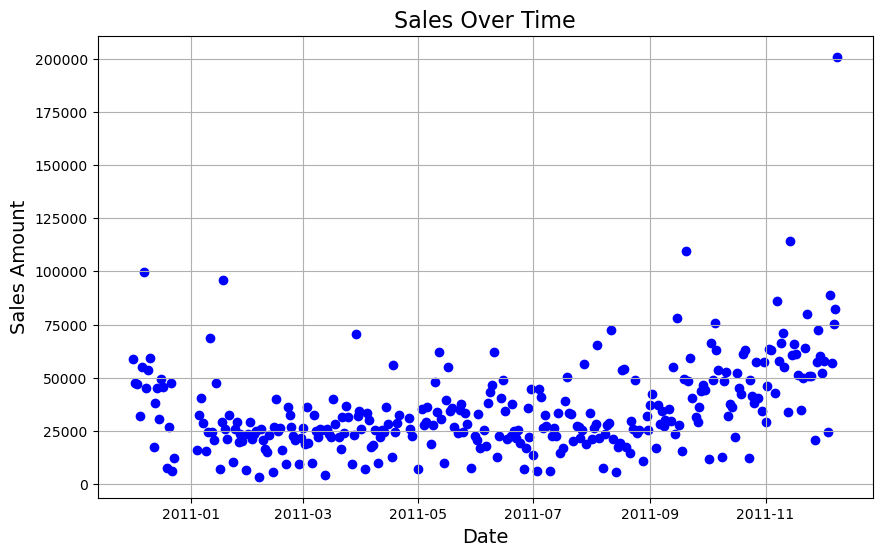

In [36]:
# Построение графика рассеивания
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['Date'], grouped_df['Revenue'], color='blue', marker='o')

# Настройка осей и заголовка
plt.title('Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales Amount', fontsize=14)
plt.grid(True)

# Отображение графика
plt.show()

In [37]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'IsCancelled', 'UK', 'st_invoice',
       'Revenue', 'Year', 'Quarter', 'Month', 'Weekday', 'Day', 'Dayofyear',
       'Date'],
      dtype='object')

In [38]:
features = ['Country', 'Month','Day','Date','StockCode']

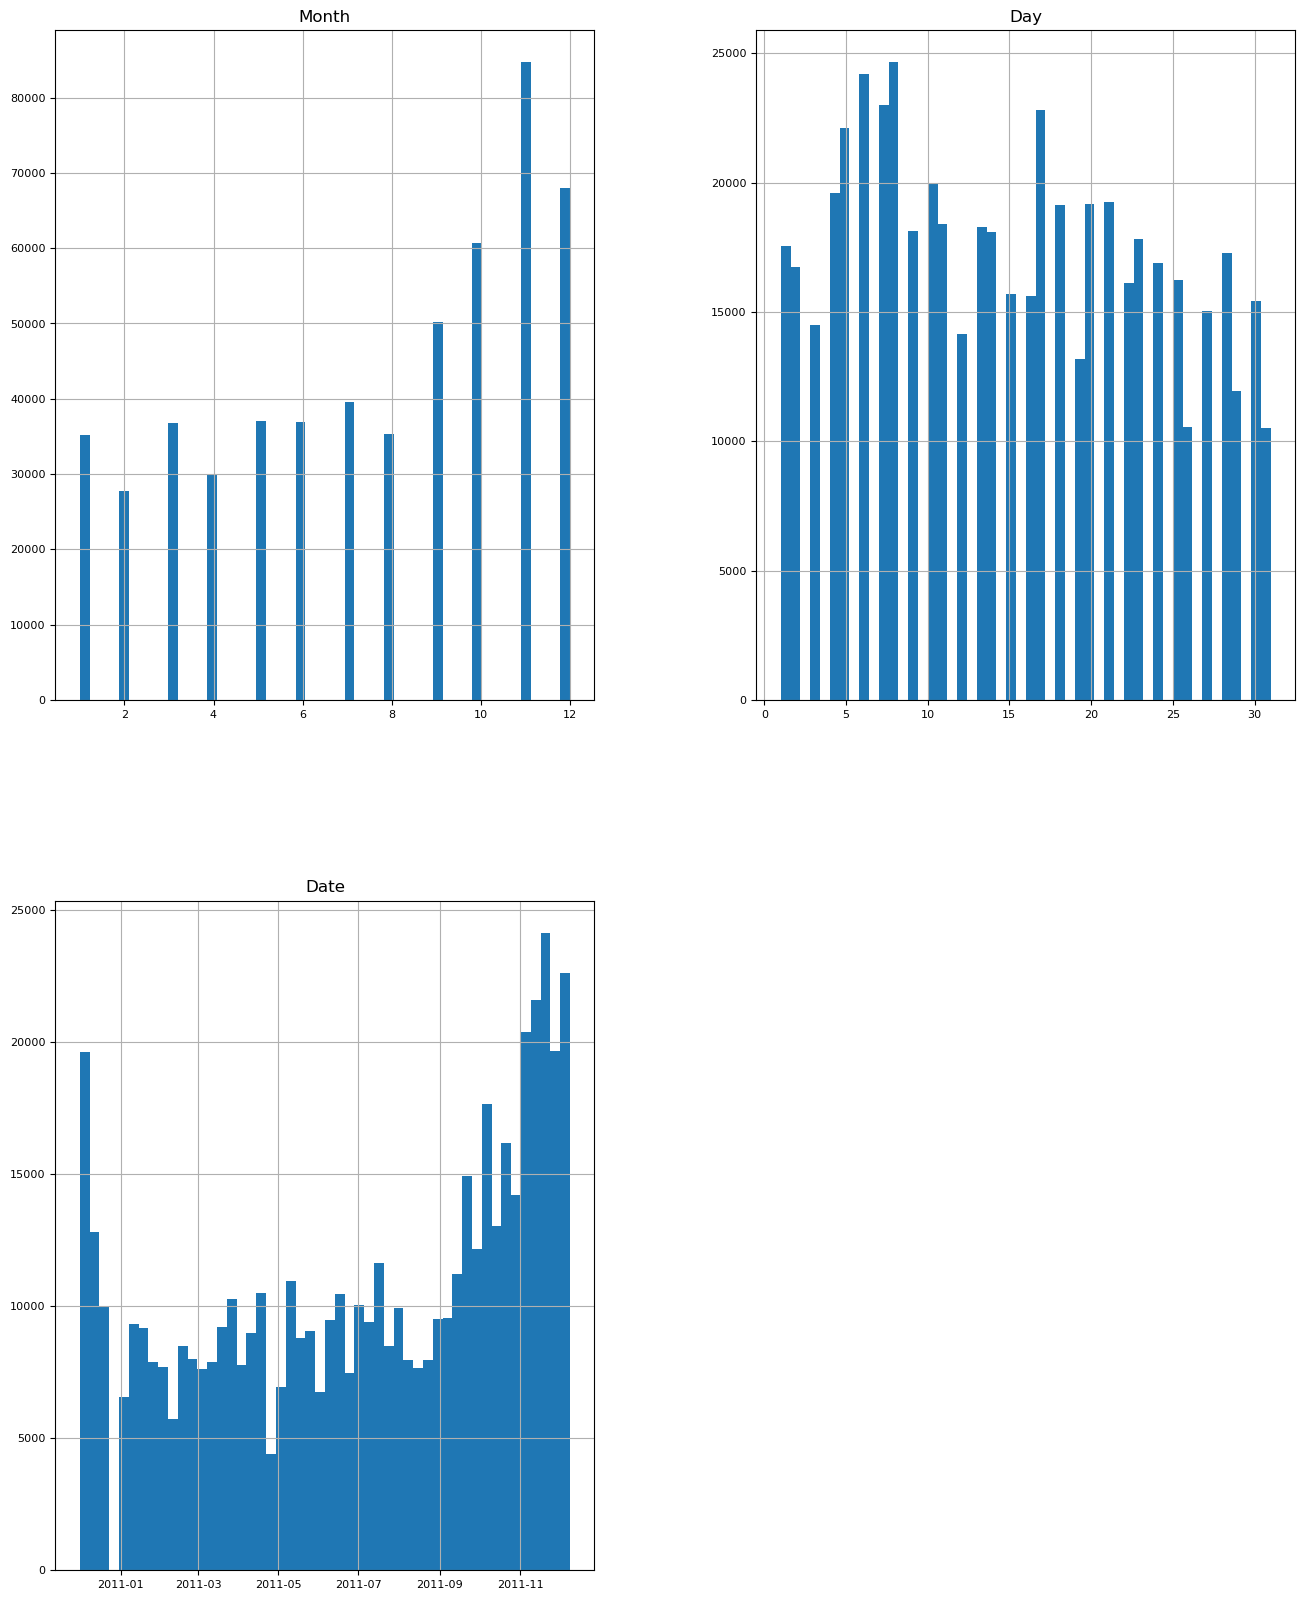

In [39]:
df[features].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### как видим из графика продажи увеличились в ноябре, предновогодние продажи.

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [41]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'IsCancelled', 'UK', 'st_invoice',
       'Revenue', 'Year', 'Quarter', 'Month', 'Weekday', 'Day', 'Dayofyear',
       'Date'],
      dtype='object')

In [42]:
df = df[(df['st_invoice']=='0') & (df['Quantity']>0)]
df['CustomerID'].fillna('0', inplace=True)
df = df[df['CustomerID']!='0']
df.head()

/tmp/ipykernel_28385/1885571050.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].fillna('0', inplace=True)
/tmp/ipykernel_28385/1885571050.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['CustomerID'].fillna('0', inplace=True)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,UK,st_invoice,Revenue,Year,Quarter,Month,Weekday,Day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,1,0,15.30,2010,4,12,2,1,335,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,1,0,20.34,2010,4,12,2,1,335,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,1,0,22.00,2010,4,12,2,1,335,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,1,0,20.34,2010,4,12,2,1,335,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,1,0,20.34,2010,4,12,2,1,335,2010-12-01


In [43]:
purchase_frequency = df.groupby('CustomerID').agg(
    first_purchase=('Date', 'min'),
    last_purchase=('Date', 'max')
)

# Вычисляем количество дней между первой и последней покупкой
purchase_frequency['days_between'] = (
    purchase_frequency['last_purchase'] - purchase_frequency['first_purchase']
).dt.days

In [44]:
purchase_frequency

,first_purchase,last_purchase,days_between
CustomerID,,,
12346.0,2011-01-18,2011-01-18,0
12347.0,2010-12-07,2011-12-07,365
12348.0,2010-12-16,2011-09-25,283
12349.0,2011-11-21,2011-11-21,0
12350.0,2011-02-02,2011-02-02,0
...,...,...,...
18280.0,2011-03-07,2011-03-07,0
18281.0,2011-06-12,2011-06-12,0
18282.0,2011-08-05,2011-12-02,119


In [45]:
purchase_frequency['days_between'].describe()

count    4339.000000
mean      130.741415
std       132.210176
min         0.000000
25%         0.000000
50%        93.000000
75%       252.000000
max       373.000000
Name: days_between, dtype: float64

Если смотреть количество дней между первой и последней покупкой, то среднее значение 130 дней. Здесь не учиывается промежуточные покупки

In [46]:
# Сортируем данные по клиенту и дате
df = df.sort_values(by=['CustomerID', 'Date'])

# Вычисляем разницу в днях между покупками для каждого клиента
df['days_between'] = df.groupby('CustomerID')['Date'].diff().dt.days


In [47]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,UK,st_invoice,Revenue,Year,Quarter,Month,Weekday,Day,Dayofyear,Date,days_between
392752,570715,22419,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,18287.0,United Kingdom,False,1,0,5.04,2011,4,10,2,12,285,2011-10-12,0.0
392753,570715,22866,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,18287.0,United Kingdom,False,1,0,25.20,2011,4,10,2,12,285,2011-10-12,0.0
423939,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287.0,United Kingdom,False,1,0,45.00,2011,4,10,4,28,301,2011-10-28,16.0
423940,573167,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287.0,United Kingdom,False,1,0,18.72,2011,4,10,4,28,301,2011-10-28,0.0
423941,573167,21014,SWISS CHALET TREE DECORATION,24,2011-10-28 09:29:00,0.29,18287.0,United Kingdom,False,1,0,6.96,2011,4,10,4,28,301,2011-10-28,0.0


In [48]:
df['days_between'].describe()

count    393585.000000
mean          1.441333
std          12.353968
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         366.000000
Name: days_between, dtype: float64

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Присваивает каждому уникальному значению целое число. Подходит для данных, где порядок имеет значение (например, small < medium < large).

In [50]:
from sklearn.preprocessing import LabelEncoder

# Применяем Label Encoding
encoder = LabelEncoder()
df['Country_encoded'] = encoder.fit_transform(df['Country'])

print("\nLabel Encoding:\n")
df.head()


Label Encoding:



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,UK,...,Revenue,Year,Quarter,Month,Weekday,Day,Dayofyear,Date,days_between,Country_encoded
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,False,1,...,77183.6,2011,1,1,1,18,18,2011-01-18,NaN,35
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,False,0,...,25.2,2010,4,12,1,7,341,2010-12-07,NaN,16
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,False,0,...,17.0,2010,4,12,1,7,341,2010-12-07,0.0,16
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,False,0,...,39.0,2010,4,12,1,7,341,2010-12-07,0.0,16
14941,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland,False,0,...,23.4,2010,4,12,1,7,341,2010-12-07,0.0,16


In [51]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,UK,...,Revenue,Year,Quarter,Month,Weekday,Day,Dayofyear,Date,days_between,Country_encoded
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,False,1,...,77183.6,2011,1,1,1,18,18,2011-01-18,NaN,35
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,False,0,...,25.2,2010,4,12,1,7,341,2010-12-07,NaN,16
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,False,0,...,17.0,2010,4,12,1,7,341,2010-12-07,0.0,16
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,False,0,...,39.0,2010,4,12,1,7,341,2010-12-07,0.0,16
14941,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland,False,0,...,23.4,2010,4,12,1,7,341,2010-12-07,0.0,16


In [52]:
encoder = LabelEncoder()
df['StockCode_encoded'] = encoder.fit_transform(df['StockCode'])

print("\nLabel Encoding:\n")
df.head()


Label Encoding:



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCancelled,UK,...,Year,Quarter,Month,Weekday,Day,Dayofyear,Date,days_between,Country_encoded,StockCode_encoded
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,False,1,...,2011,1,1,1,18,18,2011-01-18,NaN,35,1997
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,False,0,...,2010,4,12,1,7,341,2010-12-07,NaN,16,3231
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,False,0,...,2010,4,12,1,7,341,2010-12-07,0.0,16,1246
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,False,0,...,2010,4,12,1,7,341,2010-12-07,0.0,16,2652
14941,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland,False,0,...,2010,4,12,1,7,341,2010-12-07,0.0,16,1352


In [53]:
numeric_features = df[['Revenue', 'days_between','Country_encoded','StockCode_encoded']]

# --- StandardScaler ---
scaler = StandardScaler()
scaled_data_standard = scaler.fit_transform(numeric_features)

df_standard = pd.DataFrame(scaled_data_standard, columns=['Revenue', 'days_between','Country_encoded','StockCode_encoded'])
print("Масштабирование StandardScaler:\n", df_standard)

# --- MinMaxScaler ---
scaler = MinMaxScaler()
scaled_data_minmax = scaler.fit_transform(numeric_features)

df_minmax = pd.DataFrame(scaled_data_minmax, columns=['Revenue', 'days_between','Country_encoded','StockCode_encoded'])
print("\nМасштабирование MinMaxScaler:\n", df_minmax)

Масштабирование StandardScaler:
            Revenue  days_between  Country_encoded  StockCode_encoded
0       249.668037           NaN         0.320871           0.512741
1         0.009077           NaN        -2.510092           1.981018
2        -0.017456     -0.116670        -2.510092          -0.380837
3         0.053729     -0.116670        -2.510092           1.292094
4         0.003253     -0.116670        -2.510092          -0.254713
...            ...           ...              ...                ...
397919   -0.056154     -0.116670         0.320871          -0.335623
397920    0.009077     -0.116670         0.320871           0.170064
397921    0.073143      1.178462         0.320871           0.618638
397922   -0.011890     -0.116670         0.320871          -0.896043
397923   -0.049942     -0.116670         0.320871          -1.502867

[397924 rows x 4 columns]

Масштабирование MinMaxScaler:
          Revenue  days_between  Country_encoded  StockCode_encoded
0       0.458

Релевантные признаки для кластеризации:
Частота покупок (Frequency):

Количество покупок за определённый период времени.
Помогает отличить активных клиентов от тех, кто совершает редкие покупки.
Средняя стоимость покупки (Average Purchase Value):

Сумма каждой покупки, усреднённая по всем транзакциям клиента.
Позволяет выделить клиентов с разным уровнем затрат.
Общая сумма покупок (Monetary):

Общая сумма, которую клиент потратил за всё время.
Важна для сегментирования по «ценности» клиентов.
Давность последней покупки (Recency):

Количество дней с момента последней покупки.
Показывает, насколько клиент активен в последнее время.
Средний интервал между покупками (Average Days Between Purchases):

Помогает понять, с какой регулярностью клиент делает заказы.
Количество уникальных товаров (Unique Products Bought):

Показывает, насколько разнообразные покупки делает клиент.

In [54]:
customer_features = df.groupby('CustomerID').agg(
    frequency=('Date', 'count'),  # Частота покупок
    total_spent=('Revenue', 'sum'),  # Общая сумма покупок
    average_purchase_value=('Revenue', 'mean'),  # Средняя стоимость покупки
    recency=('Date', lambda x: (pd.Timestamp.today() - x.max()).days)  # Давность последней покупки
).reset_index()
customer_features.head()

,CustomerID,frequency,total_spent,average_purchase_value,recency
0,12346.0,1,77183.60,77183.600000,5022
1,12347.0,182,4310.00,23.681319,4699
2,12348.0,31,1797.24,57.975484,4772
3,12349.0,73,1757.55,24.076027,4715
4,12350.0,17,334.40,19.670588,5007


In [55]:
customer_features.describe()

,CustomerID,frequency,total_spent,average_purchase_value,recency
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,91.708689,2053.793018,68.303655,4789.041484
std,1721.889758,228.792852,8988.248381,1467.745469,100.007757
min,12346.000000,1.000000,0.000000,0.000000,4697.000000
25%,13812.500000,17.000000,307.245000,12.353054,4714.000000
50%,15299.000000,41.000000,674.450000,17.716923,4747.000000
75%,16778.500000,100.000000,1661.640000,24.848410,4838.500000
max,18287.000000,7847.000000,280206.020000,77183.600000,5070.000000


# Подготовка данных для кластеризации: Масштабирование
## Поскольку признаки могут иметь разные масштабы (например, total_spent и recency), важно привести их к единому диапазону.

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# Масштабируем данные
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['frequency', 'total_spent', 'average_purchase_value', 'recency']])

print("Масштабированные признаки:\n", scaled_features)

Масштабированные признаки:
 [[-3.96512139e-01  8.35963391e+00  5.25460210e+01  2.32967293e+00]
 [ 3.94687670e-01  2.51046358e-01 -3.04054623e-02 -9.00448767e-01]
 [-2.65374049e-01 -2.85464504e-02 -7.03757019e-03 -1.70421263e-01]
 ...
 [-3.48428173e-01 -2.08712435e-01 -3.64316011e-02 -8.50446884e-01]
 [ 2.90379646e+00  4.57171586e-03 -4.46536571e-02 -8.90448391e-01]
 [-9.48945321e-02 -2.40912314e-02 -2.86573157e-02 -5.00433697e-01]]


# Заключение:
## Эти признаки дают ценную информацию для кластеризации клиентов:

## Частота покупок (показывает активность).
## Общая сумма и средняя стоимость (отражают ценность клиента).
## Давность последней покупки (помогает выделить недавно активных клиентов).
## После выбора и масштабирования признаков можно применить алгоритмы кластеризации, такие как K-Means или DBSCAN, для выявления групп клиентов.

Определение оптимального числа кластеров: Метод локтя и Силуэтный анализ
Эти методы помогают выбрать оптимальное число кластеров для таких алгоритмов, как K-Means. Давайте рассмотрим, как реализовать метод локтя и силуэтный анализ на Python.

Метод локтя (Elbow Method)
Метод локтя основан на анализе инерции (суммы квадратов расстояний между точками и их центроидами). При увеличении числа кластеров инерция уменьшается. Оптимальным числом кластеров считается тот, где уменьшение инерции резко замедляется (образуется "локоть" на графике).

In [57]:
numeric_features = df[['Revenue', 'Country_encoded','StockCode_encoded']]

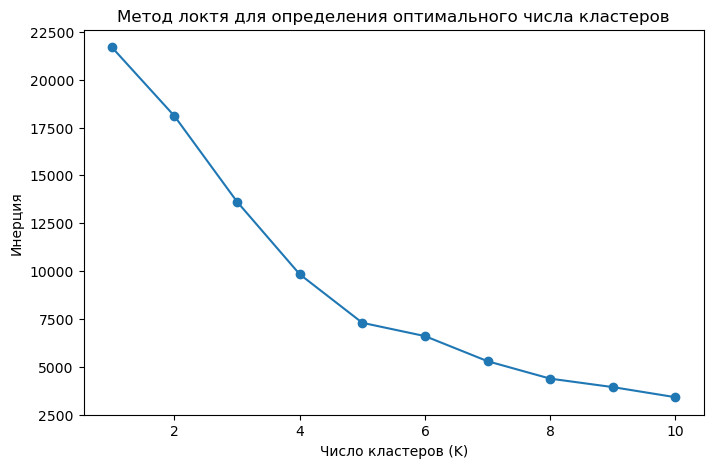

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_features)

# Применяем метод локтя
inertia = []  # Список для хранения инерции

# Проверяем значения K от 1 до 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Строим график
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Число кластеров (K)')
plt.ylabel('Инерция')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.show()

Как интерпретировать:

Найдите точку, где инерция перестаёт резко уменьшаться (образуется локоть).
Это и будет оптимальное число кластеров.

# Силуэтный анализ (Silhouette Analysis)
## Силуэтный коэффициент измеряет, насколько хорошо каждый объект совпадает с собственным кластером и насколько он отделён от соседних кластеров. Значение находится в диапазоне от -1 до 1 (чем больше, тем лучше).

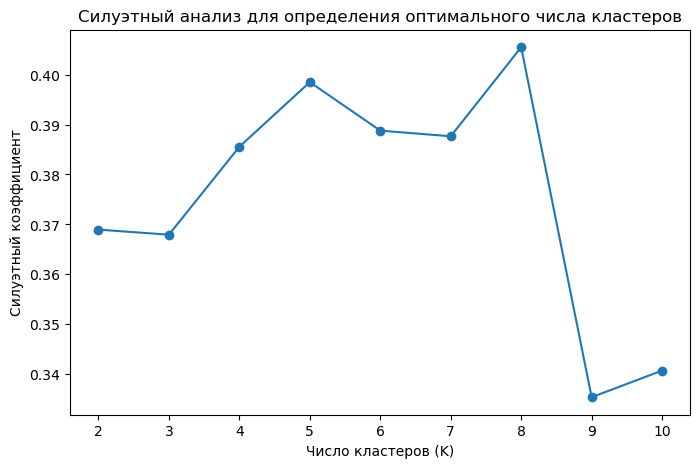

In [59]:

# Проверяем силуэтный коэффициент для разных значений K
silhouette_scores = []

for k in range(2, 11):  # K должно быть как минимум 2
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

# Строим график
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Число кластеров (K)')
plt.ylabel('Силуэтный коэффициент')
plt.title('Силуэтный анализ для определения оптимального числа кластеров')
plt.show()

## Как интерпретировать:

### Оптимальное число кластеров — это то, при котором силуэтный коэффициент максимален.
## Выбор метода:
### Метод локтя: Простой и наглядный, подходит для большинства задач.
### Силуэтный анализ: Подходит, если важно оценить качество разбиения на кластеры.

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Для кластеризации клиентов с помощью K-Means и визуализации результатов можно использовать PCA (метод главных компонент) для снижения размерности данных до 2D или 3D. В этом примере мы пройдем через полный процесс — от кластеризации до визуализации.
Перед применением K-Means важно масштабировать данные с помощью StandardScaler, чтобы признаки находились в одном диапазоне.

In [61]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_features)

Мы выберем число кластеров K=3 для примера, но его можно оптимизировать с помощью метода локтя.

In [62]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Добавляем столбец с метками кластеров в исходный DataFrame
customer_features['cluster'] = clusters
customer_features.head()

,CustomerID,frequency,total_spent,average_purchase_value,recency,cluster
0,12346.0,1,77183.60,77183.600000,5022,2
1,12347.0,182,4310.00,23.681319,4699,0
2,12348.0,31,1797.24,57.975484,4772,0
3,12349.0,73,1757.55,24.076027,4715,0
4,12350.0,17,334.40,19.670588,5007,1


Теперь используем PCA для преобразования данных в 2D-пространство для визуализации.

In [63]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Создаём DataFrame с результатами PCA и метками кластеров
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

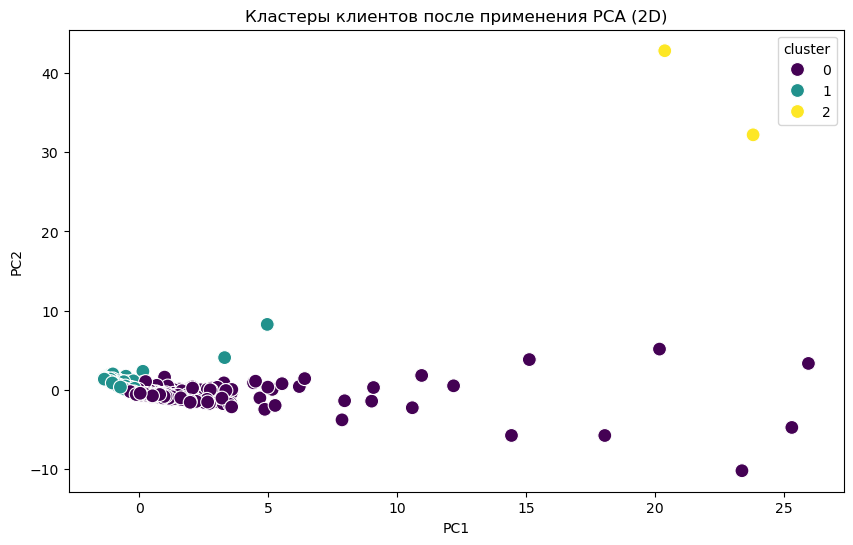

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=100)
plt.title('Кластеры клиентов после применения PCA (2D)')
plt.show()

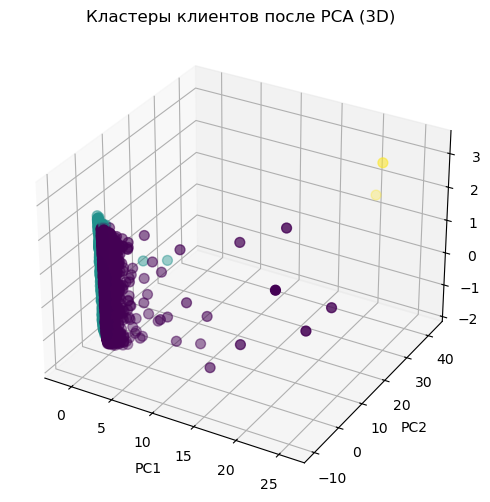

In [65]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3).fit_transform(scaled_data)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=clusters, cmap='viridis', s=50)
ax.set_title('Кластеры клиентов после PCA (3D)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

Мы применили K-Means для кластеризации клиентов и визуализировали результаты с помощью PCA. На 2D и 3D графиках можно легко увидеть, как клиенты распределены по кластерам.

Для более точного определения числа кластеров можно использовать метод локтя или силуэтный анализ, как мы обсудили ранее.